In [1]:
# %load deep_import.py
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# mnist 자료 가져옴
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test)=mnist.load_data()

In [3]:
# 데이터 정규화, 카테고리 데이터 변환 
# 모델 설계, 모델 실행
# 테스트 데이터로 모델 정확도 확인
# 검증과 학습 손실 함수의 결과를 그래프로 표현

In [4]:
X_train = X_train.reshape(X_train.shape[0],28*28).astype('float64')/255
X_test = X_test.reshape(X_test.shape[0],28*28).astype('float64')/255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
model1 = Sequential()
model1.add(Dense(512, input_dim = 28*28, activation = 'relu'))
model1.add(Dense(10, activation='softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [6]:
model1.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(patience=5)
checkpointer = ModelCheckpoint(filepath = './data/data/model/MNISTmodel.hdf5',verbose=0, save_best_only=True)
history=model1.fit(X_train, y_train, validation_split=0.25, verbose=0, epochs=40, batch_size=200, callbacks=[early_stopping, checkpointer])

In [7]:
print("Test Accuracy : %.4f" % (model1.evaluate(X_test,y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0678 - accuracy: 0.9812
Test Accuracy : 0.9812


In [8]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

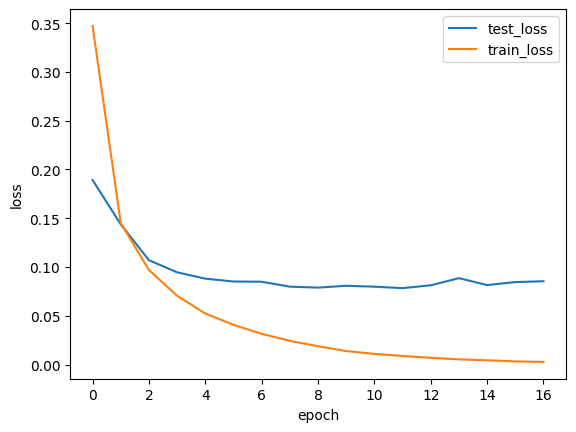

In [9]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, label='test_loss')
plt.plot(x_len, y_loss, label='train_loss')
plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 딥러닝 실행 후 테스트 정확도 결과 확인
# 클래스 확인
# from tensorflow.keras.datasets import fashion_mnist